# The Jarvis March Algorithm

We wish to implement the Jarvis March Algorithm in python, in order to obtain the convex hull of a set of points in a plane. In addition, we write new pseudo code of the algorithm and compare it with existing pseudo code and consider the computational complexity of the problem. 

## Python implementation

Below we see the python implementation of the JM algorithm.

In [42]:
# coding up the JM algorithm using OOP and class objects

# creating a point class
class point:
    # objects of this class have x and y properties
    # each are inputs in the class object
    def __init__(self, x, y):
        self.x = x
        self.y = y
        
    # function to convert data in 2 column format into a list of points
    def pointlist(data):
        # initialising list of points
        plist = []
        n = len(data[0])
        for i in range(n):
            p = point(data[0][i], data[1][i])
            # ensuring no duplicates
            count = 0 # initialise
            for pin in plist: # for all points already in list
                if p.x == pin.x:
                    if p.y == pin.y:
                        count+=1 # count increases if repeat
            if count == 0: # if p is not already in the list
                plist.append(p) # append                 
        return plist # output - list of objects of point class
    
    # function for finding initial starting point
    # starting at leftmost point (lowest x value)
    
    def findleft(points): # input - list of point objects
        # set of points considered
        # initial point (first in list)
        start = points[0]
        # if lower x value exists - make new start point
        for i in range(len(points)):
            if points[i].x < start.x:
                start = points[i]
            if points[i].x == start.x:
                if points[i].y < start.y:
                    start = points[i]
        return start
    
    # function to calculate Euclidean distance
    
    def Euc_dist(a,b):
        diffx = abs(a.x - b.x) # difference in x
        diffy = abs(a.y - b.y) # difference in y
        dist = np.sqrt(diffx**2 + diffy**2) # pythagoras
        return dist
    
    # main jm algorithm
    
    def jm(data):
        # set of points to find convex hull for
        points = point.pointlist(data)
        
        # starting point
        p = point.findleft(points)
        
        # constraint for <= 3 data points
        if len(points) < 3: # if fewer than 3 points
            return points # return all points
        if len(points) == 3: # if 3 points
            # checking if gradients the same
            if (points[1].y - points[0].y)*(points[2].x - points[1].x) - \
            (points[1].x - points[0].x)*(points[2].y - points[1].y) == 0:
                # selecting two points with the greatest euclidean distance
                    pair = [] # initialising set of points
                    pairdist = -1 # initialising Euclidean distance
                    for i in range(3): # for all pairs of points
                        for j in range(3):
                            if point.Euc_dist(points[i], points[j]) > pairdist: # find pair with largest distance
                                pair = [points[i], points[j]] # update
                                pairdist = point.Euc_dist(points[i], points[j]) # update
                    return pair # output this pair

            else:
                return points # output all 3 points
        

        
        # initialising the list of points in convex hull
        ch = [p] # includes starting point
        
        # finding q s.t.for all r, p-q-r is anti-clockwise
        while (True): # looping until whole convex set found
            for q in points: # for each potential q
                acw = 0 # initialise count
                colin = [] # list for colinear
                for r in points: # for each potential r
                    if q != p: # q can't be same as p
                        if r != p: # r can't be same as p
                            if r != q: # r can't be same as q
                                # adding only a/cw points to set
                                # these points satisfy cross product < 0
                                # as sin(\theta) > 0 for 0 < \theta < 180
                                cp = (q.y - p.y)*(r.x - q.x) - (q.x - p.x)*(r.y - q.y)
                                # recording if cross product < 0 for each r
                                if cp <= 0:
                                    acw += 1 # update
                                if cp == 0: # if gradient the same between p-q and q-r
                                    # append all points to set of colinear points
                                    colin.append(q)
                                    colin.append(r)
                    # if a/cw for all r
                    if acw == len(points) - 2:
                        # adding in colinearity constraint
                        if len(colin) != 0: # if there are co-linear points on boundary
                            colin = list(set(colin)) # removing repeats
                            farq = p # initialise furthest q
                            dist = 0 # initialise distance from p
                            for a in range(len(colin)): # for all colinear points
                                if point.Euc_dist(p, colin[a]) > dist: # find furthest from p
                                    farq = colin[a]
                                    dist = point.Euc_dist(p, colin[a])
                            q = farq # make this new q
                        
                        ch.append(q) # add q to convex hull
                        p = q # q is new p
                        break
            # break condition for while loop            
            if len(ch) != len(list(set(ch))): # if adding a point already in set 
                chfin = list(dict.fromkeys(ch))# removing duplicates, retaining order
                break
                            
        return chfin

## Graphical presentation

Following the implementation of the algorithm, we can graphically represent the set of points in a 2-D plane, along with the set of points that form the convex hull.

Using ggplot, we can plot the findings to check the algorithms. These are presented below, for each of the four datasets.

In [2]:
# importing csv, plotnine, numpy, pandas and other relevant packages
import csv
import pandas as pd
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_line, geom_path
import numpy as np

### Data set 1 - square.csv

In [43]:
# reading in the data

# open the file
with open('square.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # do not know how many rows - so initialise some empty lists
    C1 = []
    C2 = []
    # read each row of the file ...
    for row in csv_reader :
        # .. and put the data into the lists
        C1.append(float(row[0]))
        C2.append(float(row[1]))

# saving data
squaredat = [C1,C2]
squaredat

[[1.0, 2.0, 2.0, 1.0, 1.5, 1.5], [1.0, 1.0, 2.0, 2.0, 1.5, 2.5]]

In [44]:
# list of points in convex hull

[(a.x, a.y) for a in point.jm(squaredat)]

[(1.0, 1.0), (2.0, 1.0), (2.0, 2.0), (1.5, 2.5), (1.0, 2.0)]

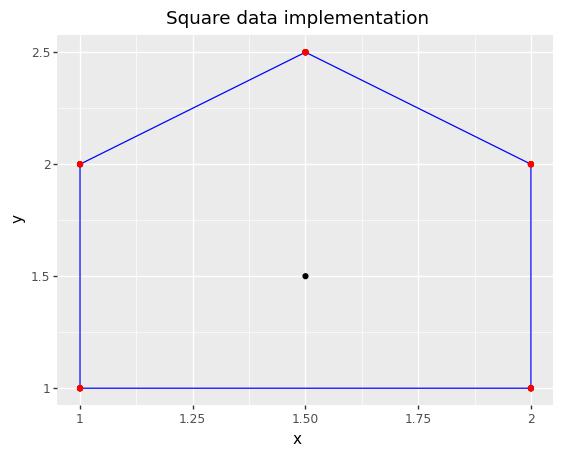

<ggplot: (8747330619537)>

In [45]:
# plot package
from plotnine.labels import labs

# changing data into pd dataframe
X = squaredat[0]
Y = squaredat[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(squaredat)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})

p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Square data implementation",
    x = "x",
    y = "y"
  )
    
p

### Data set 2 - line.csv

In [46]:
# reading in the data

# open the file
with open('line.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # do not know how many rows - so initialise some empty lists
    C1 = []
    C2 = []
    # read each row of the file ...
    for row in csv_reader :
        # .. and put the data into the lists
        C1.append(float(row[0]))
        C2.append(float(row[1]))
# saving data
linedat = [C1,C2] 
linedat

[[1.0, 2.0, 3.0], [1.0, 2.0, 3.0]]

In [47]:
# list of points in convex hull

[(a.x, a.y) for a in point.jm(linedat)]

[(1.0, 1.0), (3.0, 3.0)]

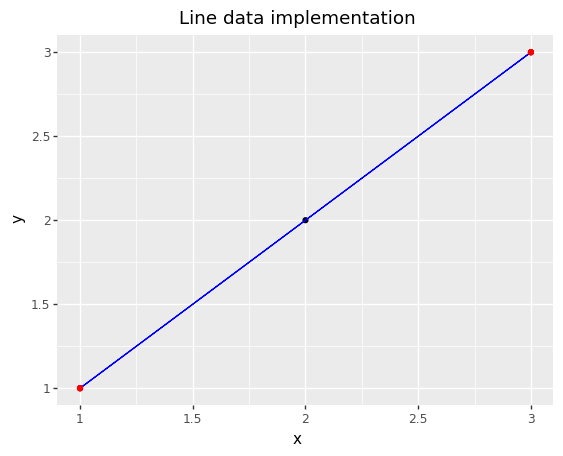

<ggplot: (8747331716840)>

In [56]:
# changing data into pd dataframe
X = linedat[0]
Y = linedat[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(linedat)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})


p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")
for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red")  + labs(
    title = "Line data implementation",
    x = "x",
    y = "y"
  )
    
p

### Data set 3 - pgram.csv

In [49]:
# reading in the data

# open the file
with open('pgram.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # do not know how many rows - so initialise some empty lists
    C1 = []
    C2 = []
    # read each row of the file ...
    for row in csv_reader :
        # .. and put the data into the lists
        C1.append(float(row[0]))
        C2.append(float(row[1]))

# saving data
pgramdat = [C1,C2] 
pgramdat

[[1.0, 2.0, 3.0, 2.0, 2.0, 2.5], [1.0, 1.0, 2.0, 2.0, 1.5, 2.5]]

In [50]:
# list of points in convex hull

[(a.x, a.y) for a in point.jm(pgramdat)]

[(1.0, 1.0), (2.0, 1.0), (3.0, 2.0), (2.5, 2.5)]

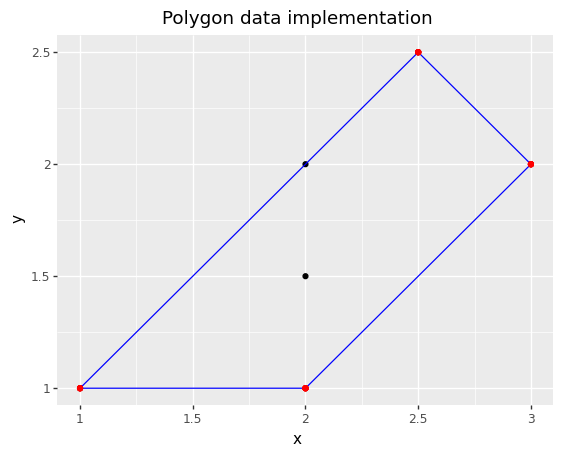

<ggplot: (8747330481824)>

In [57]:
# changing data into pd dataframe
X = pgramdat[0]
Y = pgramdat[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(pgramdat)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})


p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Polygon data implementation",
    x = "x",
    y = "y"
  )
    
p

### Data set 4 - random.csv

In [52]:
# reading in the data

# open the file
with open('random.csv',mode='r') as csv_file :
    # create a reader - this allows a delimiter to be specified and used
    csv_reader = csv.reader(csv_file, delimiter=',')
    # do not know how many rows - so initialise some empty lists
    C1 = []
    C2 = []
    # read each row of the file ...
    for row in csv_reader :
        # .. and put the data into the lists
        C1.append(float(row[0]))
        C2.append(float(row[1]))
# saving data
randat = [C1,C2]
randat

[[0.237561302163444,
  -0.19666778615857,
  -0.403757362758993,
  -0.015823698629412,
  -0.71657388106957,
  -0.404177827637558,
  -0.0711562803815665,
  -0.294185993867548,
  -0.339267115522964,
  -0.30695534656493,
  -0.351025910061367,
  -0.15748427231087,
  -0.553673448912094,
  -0.402182286851385,
  -0.709905161865041,
  0.0601768379729519,
  -0.197401784148526,
  -0.192276719541008,
  -0.0249492438997409,
  0.0164663263604486,
  -0.181126246217823,
  -0.223454731447005,
  0.146267163074623,
  -0.134969469933107,
  0.072539756232434,
  -0.0730267264932693,
  -0.324464721714733,
  -0.410635588048491,
  -0.0644350699979273,
  -0.342468928753809,
  -0.200134134317872,
  -0.354881387696607,
  0.385689000684809,
  -0.396689591245523,
  -0.210904511604826,
  -0.282361813633514,
  -0.54649702109491,
  -0.33108577463949,
  -0.543577355397004,
  -0.0954519588178808,
  -0.493300803983735,
  -0.432249029757549,
  -0.1953723646099,
  -0.40323283840931,
  -0.30137591987986,
  0.068920093798963

In [53]:
# list of points in convex hull

[(a.x, a.y) for a in point.jm(randat)]

[(-0.71657388106957, 1.20219702232312),
 (-0.605200231305254, 0.957134110706781),
 (-0.432249029757549, 0.600185398765638),
 (0.156196864138666, 0.537196258340319),
 (0.353922330922547, 0.654945271536898),
 (0.505823570824408, 1.12001307650065),
 (0.358984412999769, 1.56677311480003),
 (-0.380951747864001, 1.45310545712829),
 (-0.545292317957066, 1.4050365090573)]

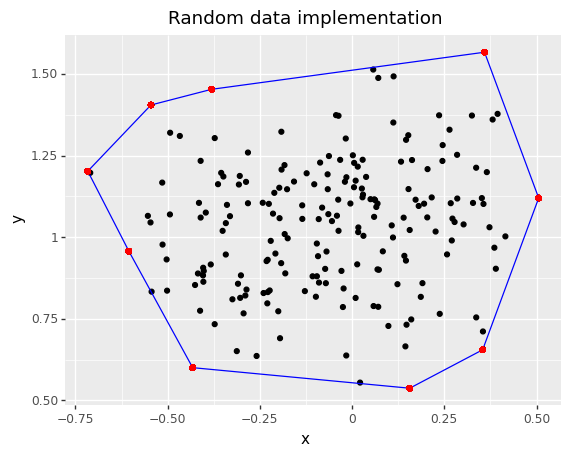

<ggplot: (8747330425131)>

In [58]:
# changing data into pd dataframe
X = randat[0]
Y = randat[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(randat)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})


p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red")
    
for i in range(len(hull)):
    p = p + geom_path(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Random data implementation",
    x = "x",
    y = "y"
  )
    
    
p

## Test cases

### Test case 1 - Less than 3 points

The definition of a convex hull might be stretched when there are less than 4 points in the set being considered. within the function, we add the below constraint to deal with such cases.

After obtaining the list of points p, the function checks the length of this list and outputs the list if it has less than 4 elements. In this case, we are defining a convex hull of a single point to be just that point, for 2 points, both form the convex hull and similar for 3 points.

    # constraint for <= 3 data points
    if len(p) <= 3:
        return p
        
As in the above implementations, all points in the convex hull are displayed in red.

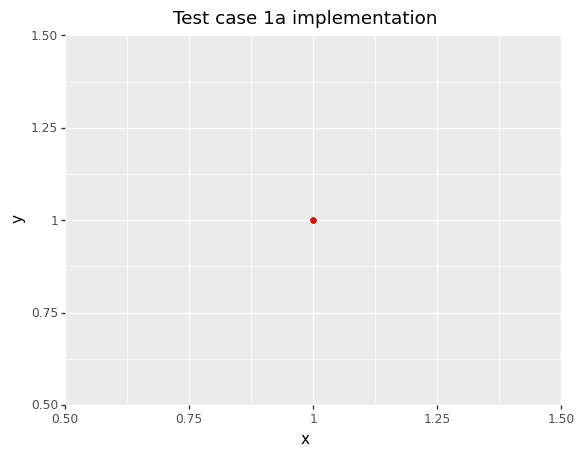

<ggplot: (8747330407807)>

In [59]:
# checking test case 1

## 1 data point

tc11 = [[1],[1]]

X = tc11[0]
Y = tc11[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(tc11)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})

p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Test case 1a implementation",
    x = "x",
    y = "y"
  )
    
p

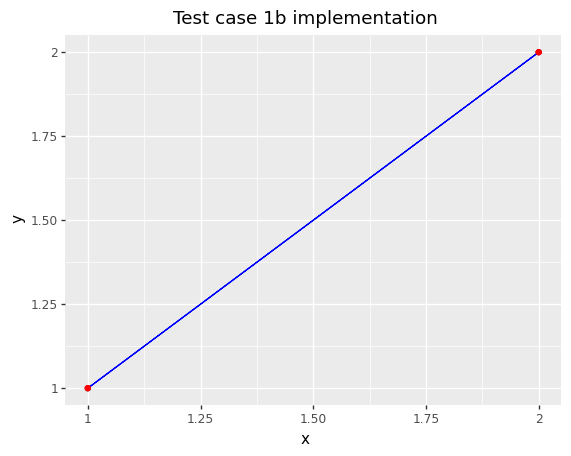

<ggplot: (8747330409903)>

In [60]:
# checking test case 1

## 2 data points

tc12 = [[1,2],[1,2]]

X = tc12[0]
Y = tc12[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(tc12)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})

p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")
for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Test case 1b implementation",
    x = "x",
    y = "y"
  )
    
p

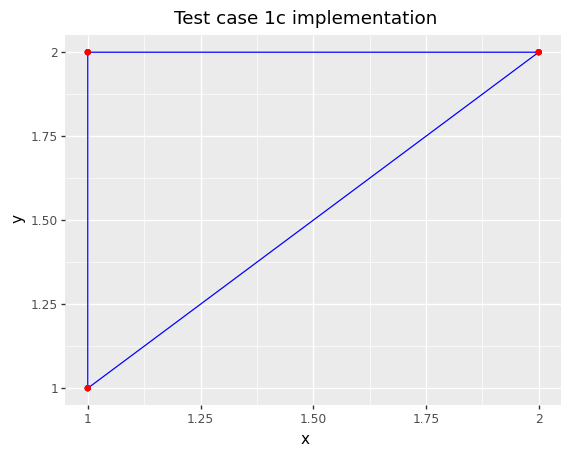

<ggplot: (8747330325080)>

In [61]:
# checking test case 1

## 3 data points

tc13 = [[1,2,1],[1,2,2]]

X = tc13[0]
Y = tc13[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(tc13)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})

p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Test case 1c implementation",
    x = "x",
    y = "y"
  )
    
p

### Test case 2 - 3 co-linear points

The algorithm has to be able to handle data sets where some (or all) of the points in the convex hull lie on the same line. Within the literature there is no explicit consensus as to whether or not colinear points are included within the convex hull. As the definition of a convex hull is the smallest set of points that form the boundary containing all points in the set, in this assessment we define our convex hull such that any intermediate co-linear points are not included in the set.

Therefore, we must ensure that the algorithm always doesn't include intermediate co-linear points.

In order to work out the optimal points we need to consider the Euclidean distance of 2 points, hence, we introduce the following function.

    def Euc_dist(a,b):
        diffx = abs(a.x - b.x)
        diffy = abs(a.y - b.y)
        dist = np.sqrt(diffx**2 + diffy**2)
        return dist

Firstly, we must adapt the constraint for three or fewer data points, as 3 points can lie on the same line.


        # constraint for <= 3 data points
        if len(points) < 3: # if fewer than 3 points
            return points # return all points
        if len(points) == 3: # if 3 points
            # checking if gradients the same
            if (points[1].y - points[0].y)*(points[2].x - points[1].x) - \
            (points[1].x - points[0].x)*(points[2].y - points[1].y) == 0:
                # selecting two points with the greatest euclidean distance
                    pair = []
                    pairdist = -1
                    for i in range(3):
                        for j in range(3):
                            if point.Euc_dist(points[i], points[j]) > pairdist:
                                pair = [points[i], points[j]]
                                pairdist = point.Euc_dist(points[i], points[j])
                    return pair

            else:
                return points
        
The above constraint only affects the setting where we have 3 data points. A similar constraint has to be added within the main jm step of the algorithm to ensure that only the points on the line furthest away from p are added to the convex hull set of points.


By appending all colinear points to a list colin, we add in the following constraint when selecting the new q:

        if len(colin) != 0: # if there are co-linear points on boundary
            colin = list(set(colin)) # removing repeats
            farq = p # initialise furthest q
            dist = 0 # initialise distance from p
            for a in range(len(colin)): # for all colinear points
                if point.Euc_dist(p, colin[a]) > dist: # find furthest from p
                    farq = colin[a]
                    dist = point.Euc_dist(p, colin[a])
            q = farq # make this new q



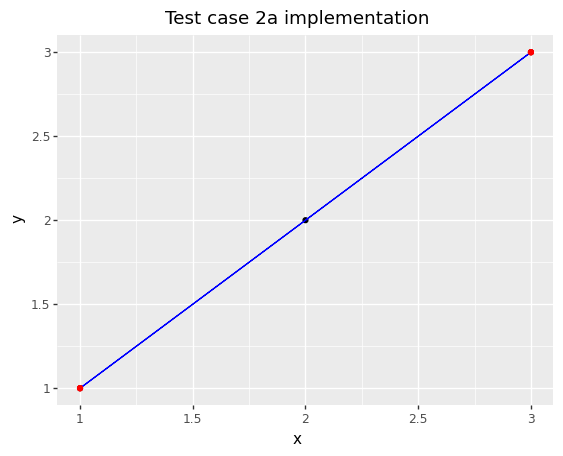

<ggplot: (8747330407756)>

In [62]:
# checking test case 2

## 3 colinear points

tc21 = [[1,2,3],[1,2,3]]

X = tc21[0]
Y = tc21[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(tc21)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})

p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Test case 2a implementation",
    x = "x",
    y = "y"
  )
    
p

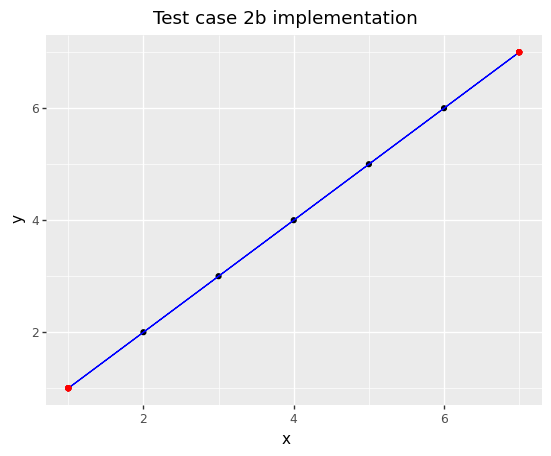

<ggplot: (8747330200468)>

In [63]:
# checking test case 2

## 7 colinear points

tc22 = [[1,2,3,4,5,6,7], [1,2,3,4,5,6,7]]

X = tc22[0]
Y = tc22[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(tc22)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})

p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Test case 2b implementation",
    x = "x",
    y = "y"
  )
    
p

### Test case 3 - multiple leftmost points

In initialising the JM algorithm, we select the leftmost point as an initial starting location for the procedure, therefore, the algorithm must be able to handle the case where there are more than 1 point with equal lowest x value.

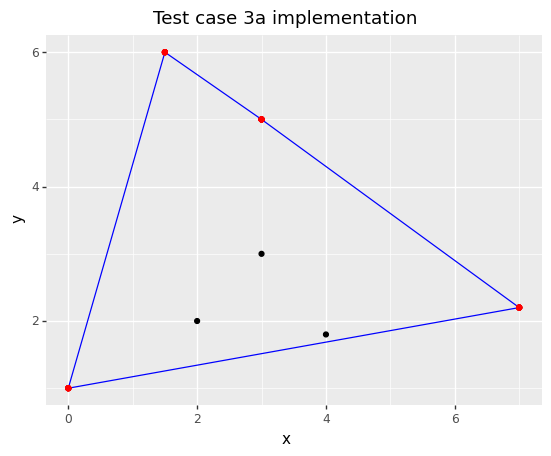

<ggplot: (8747330132140)>

In [64]:
# checking test case 3

## 1 leftmost point

tc31 = [[0,2,3,7,3,1.5,4], [1,2,3,2.2,5,6,1.8]]

X = tc31[0]
Y = tc31[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(tc31)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})

p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red") + labs(
    title = "Test case 3a implementation",
    x = "x",
    y = "y"
  )
    
p

An issue arises when there are multiple left points, as without an additional constraint, the algorithm will pick the first point in the dataset that has the lowest x value. This might appear in the middle of the colinear set of leftmost points, meaning an additional point will be added to the convex set. We need to ensure that the algorithm begins from the point with the lowest x value, and if there are two points with this x value, it chooses the one with the lowest y. To do this, we add the constraint in point.findleft():

    def findleft(points): # input - list of point objects
        # set of points considered
        # initial point (first in list)
        start = points[0]
        # if lower x value exists - make new start point
        for i in range(len(points)):
            if points[i].x < start.x:
                start = points[i]
            if points[i].x == start.x:
                if points[i].y < start.y:
                    start = points[i]
        return start

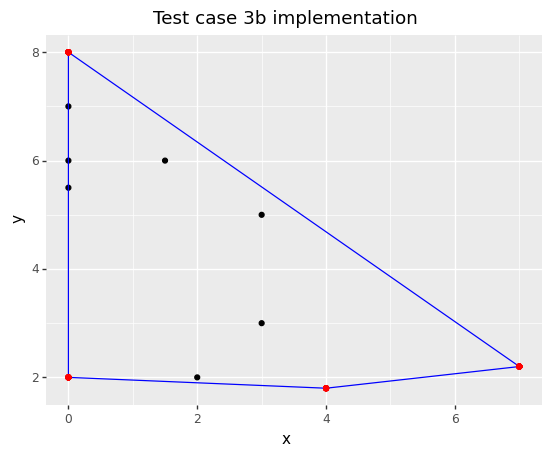

<ggplot: (8747330106905)>

In [65]:
# checking test case 3

## 5 leftmost points

tc31 = [[0,2,3,7,3,1.5,4,0,0,0,0], [7,2,3,2.2,5,6,1.8,8,2,5.5,6]]

X = tc31[0]
Y = tc31[1]
df = pd.DataFrame({'X' : X, 'Y' : Y })
df

# plotting the points in black with convex hull in red

p = ggplot(df,aes(x=X,y=Y)) + geom_point()

hull = point.jm(tc31)

# including blue lines to connect points in convex hull

hullx = [pp.x for pp in hull]
hullx.append(hullx[0]) # including initial point at end
hully = [pp.y for pp in hull]
hully.append(hully[0]) # including initial point at end
hulldf =  pd.DataFrame({'X': hullx, 'Y': hully})

p = p + geom_path(hulldf, aes(x=hullx, y=hully), color = "blue")

for i in range(len(hull)):
    p = p + geom_point(x = hull[i].x, y = hull[i].y, color = "red")  + labs(
    title = "Test case 3b implementation",
    x = "x",
    y = "y"
  )
    
p

## Test case 4 - two data points share the same co-ordinate

The algorithm in a primative form would not handle multiple data points at the same co-ordinates. Therefore, in the function that takes a list and creates point objects, we add the constraint to remove duplicate points. This won't affect the convex hull and will allow the algorithm to work in this setting.

    def pointlist(data):
        # initialising list of points
        plist = []
        n = len(data[0])
        for i in range(n):
            p = point(data[0][i], data[1][i])
            # ensuring no duplicates
            count = 0 # initialise
            for pin in plist: # for all points already in list
                if p.x = pin.x:
                    if p.y = pin.y:
                        count+=1 # count increases if repeat
            if count != 0: # if p is not already in the list
                plist.append(p) # append                 
        return plist # output - list of objects of point class
    


In [22]:
# checking test case 4

# 3 repeated points

tc41 = [[0,2,3,7,3,1.5,4,0,0,0,0], [7,2,3,2.2,5,6,1.8,8,0,0,0]]

# should only output 1 point with coordinates (0,0)

[(p.x, p.y) for p in point.pointlist(tc41)]

[(0, 7), (2, 2), (3, 3), (7, 2.2), (3, 5), (1.5, 6), (4, 1.8), (0, 8), (0, 0)]

## Pseudo code

Below we see a programmer's pseudo code for the JM algorithm. We propose new pseudo code for the algorithm that is more intuitive and interpretable.

### Version 1

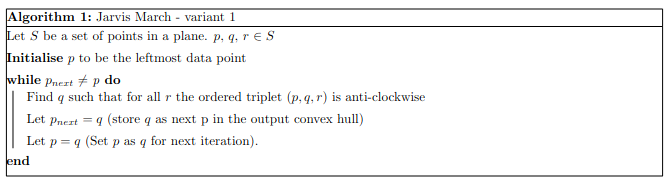

### Version 2

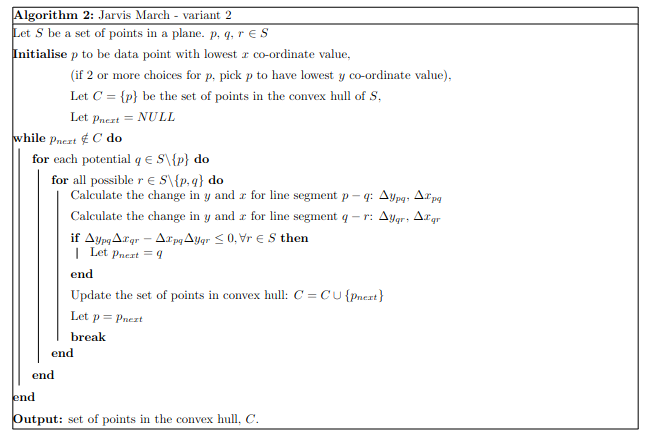

### Comparison of pseudo-code

The first variant of the pseudo-code is not entirely prescriptive. It leaves a lot of assumptions to the reader and isn't explicit in the way in which certain procedures are carried out. The variable $p_{next}$ is updated without being formally defined, the method for storing node $q$ isn't defined, nor is the procedure for which you determine the orientation of the ordered triplet $(p,q,r)$. In general, this pseudo-code is not easy to work with, understand or implement due to these ambiguities.

The second variant of the pseudo-code is more of an explicit method. It outlines each of the steps in greater detail, with definitions of each of the parameters prior to their usage. The algorithm has more of a formal structure, with for loops and if statements being given in full, allowing for a more clear presentation of the calculation phase of the algorithm. Furthermore, the way in which the pseudo-code is laid out follows a structure more reminiscent of actual code, allowing for easier reading and implementation by the reader. 

Another difference in the second variant is the choice of an explicit method for determining the orientation of the ordered triplet $(p,q,r)$. Rather than simply asking the reader to find the $q$ such that $(p,q,r)$ is anti-clockwise, this algorithm gives the method in full, again allowing for easier implementation. By introducing set notation into the algorithm, some of the ambiguities of the first algorithm are avoided - particularly in the stopping condition and the storing and updating procedures of $p$, $q$ and $p_{next}$.

To summarise, whilst both variants of the algorithm pseudo-code outline the same method for implementing the Jarvis March algorithm, the intuitive manner in which variant two outlines the procedure (leaving little in the way of ambiguities, using more appropriate syntax, being more prescriptive) makes it the superior of the two algorithm pseudo-codes.

## Computational complexity


The performance of the algorithm is correlated with the number of points being considered. The more points that need to be considered, the longer the algorithm will take. In order to quantify the relationship between the number of points and the runtime, we consider the computational complexity of the algorithm.

Let $n$ = the number of data points.

The algorithm must first carry out a search for the starting value (leftmost point) - this means that $n$ datapoints are considered and this step has a complexity of $\mathcal{O}(n)$.

Following the choice of a starting point, the algorithm must check all pairs of combinations for the nodes $q$ and $r$. In doing this, the upper bound on the amount of nodes being checked is $n-1$ (the number of potential $q$s) multiplied by n-2 (the number of potential $r$s). This means, using big O notation, we have a computational complexity for each step of the Jarvis March algorithm that is quadratic in the number of points: $\mathcal{O}(n^2)$. 

This $\mathcal{O}(n^2)$ procedure has to take place within a while loop, which restricts the algorithm to stop when it adds the starting point to the convex hull again. Let $h$ be the number of points in the convex hull, this means that this implementation of the Jarvis March algorithm has an overall computational complexity of $\mathcal{O}(n^2h)$, i.e., in the best case scenario it has order $\mathcal{O}(n^2)$  and in the worst (when all points are on the convex hull) it is $\mathcal{O}(n^3)$. 

## Testing time complexity

In order to test the algorithm's effectiveness in practice, we consider the time taken to carry out the procedure when presented with an increasing number of points. By recording the time taken for each pass of the algorithm, we can plot how this changes with the number of points. 

In each case, we draw from a bivariate normal distribution with mean (2,4) and variance-covariance matrix [[4,0],[0,16]]. We record the time taken to carry out the algorithm on datasets where the number of points increases in increments of 50. We repeat the process for a total of 10 macro-replications and average these values. This is then plotted against the number of points. 

In [23]:
# importing relevant packages
import random
import time

The reasoning behind carrying out the macro-replications is due to the stochastic nature with which the data sets are produced. Certain generated datasets will allow for a quicker algorithm time - i.e., as the computational time depends on the number of points in the convex hull $h$, when $h$ is small, the algorithm will run quicker than if there were a large $h$.

By repeating the implementation a number of times we can take into account the variance in the simulation. For a fixed sample size of 100, we carry out the procedure 100 times. Below, we see the histogram of the times, highlighting the stochastic variation due to the way in which data is sampled.

/home/lambert4/STOR-601-env/env/lib/python3.9/site-packages/plotnine/stats/stat_bin.py:95: PlotnineWarning: 'stat_bin()' using 'bins = 7'. Pick better value with 'binwidth'.


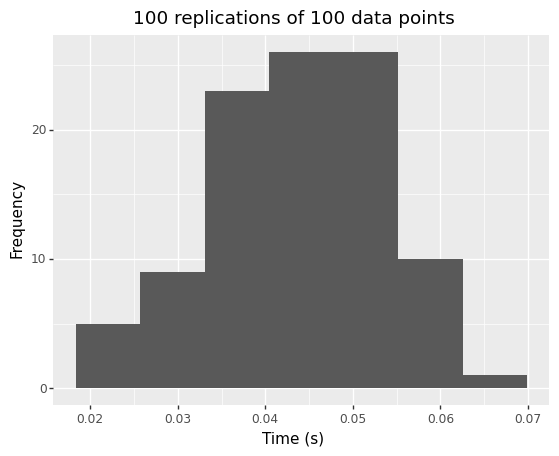

<ggplot: (8747330252740)>

In [66]:
from plotnine import geom_histogram

# jm procedure for dataset of size 100
# carry out 100 replications

times = [] # initialise list
for j in range(100):
    # drawing from same distribution
    x = list(np.random.normal(10, 2, 100))
    y = list(np.random.normal(20, 4, 100))
    data = [x,y]
    
    # recording time
    start = time.perf_counter()
    # carrying out algorithm
    hull = point.jm(data)
    end = time.perf_counter()
    times.append(end - start)

# creating pandas dataframe
Time = times
Points = sizes
df = pd.DataFrame({'Time' : Time})
df

# plotting the times and points
# stochastic variation seen in histogram
p = ggplot(df,aes(x=Time))
p + geom_histogram()  + labs(
    title = "100 replications of 100 data points",
    x = "Time (s)",
    y = "Frequency"
  )

Due to this stochastic variability, when testing the effect of sample size on computational time, we carry out 10 macro-replications and plot the mean of these times.

In [24]:
# simulating increasing datasets

## this takes a few mins (~6.5) to run due to the number of replications
## as well as the fact we use 20 sizes of data sets

# list of dataset sizes
sizes = list(range(50, 1050, 50))

# list of times 
times = []

# generating random data set of this size

# for each sample size
for i in sizes:
    # carry out 10 replications
    tav = [] # initialise list
    for j in range(10):
        # drawing from same BVN distribution
        x = list(np.random.normal(10, 2, i))
        y = list(np.random.normal(20, 4, i))
        data = [x,y]
        
        # recording time
        start = time.perf_counter()
        # carrying out algorithm
        hull = point.jm(data)
        end = time.perf_counter()
        tav.append(end - start)
    times.append(np.mean(tav)) # appending average of 10 times

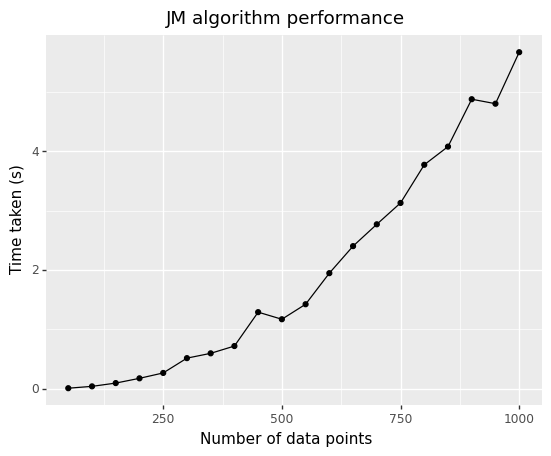

<ggplot: (8747331689186)>

In [25]:
# creating pandas dataframe
Time = times
Points = sizes
df = pd.DataFrame({'Time' : Time, 'No of points' : Points})
df

# plotting the times and points
p = ggplot(df,aes(y=Time,x=Points))
p1 = p + geom_line()
p1 + geom_point()  + labs(
    title = "JM algorithm performance",
    x = "Number of data points",
    y = "Time taken (s)"
  )

In the above plot, we see that the computational time of the algorithm appears to increase quadratically in the number of points, as was proposed in the section discussing the order of the algorithm.

## Comparison with worst-case scenario

As was mentioned previously, this implementation has a best-case complexity of $\mathcal{O}(n^2)$ and worst-case complexity of $\mathcal{O}(n^3)$. If we repeat the above experiment, at each step recording the time taken when carrying out the algorithm on uniformly generated data, bivaraite normal data and data where all points lie on a circle (worst case) we can compare the time taken between the different scenarios. Allowing us to see under which circumstances this implementation works well.

In [32]:
# simulating increasing datasets


###########################################
##### DAN PLEASE READ BEFORE YOU RUN  #####
###########################################

## this will run successfully if you restart the kernel
## however, it will take about 7 hours... (413 mins last time)

startstart = time.perf_counter()
# list of dataset sizes
sizes = list(range(50, 1050, 50))

# list of times 
times = []
times2 = []
times3 = []

# generating random data set of this size

# for each sample size
for i in sizes:
    # carry out 10 replications
    tav = [] # initialise lists
    tav2 = []
    tav3 = []
    for j in range(10):
        
        # uniform data
        x = list(np.random.uniform(-1,1,i))
        y = list(np.random.uniform(-1,1,i))
        data = [x,y]
        
        # bivariate normal data
        x = list(np.random.normal(0, 1, i))
        y = list(np.random.normal(0, 1, i))
        data2 = [x,y]
        
        # data on circumference
        x = list(np.random.uniform(-1,1,i))
        y = []
        for j in range(len(x)):
            y.append(np.sqrt(1 - x[j]**2))
            # changing sign to make sure not all y +ve
            if float(np.random.uniform(0,1,1)) > 0.5:
                y[j] = y[j]*(-1)
        data3 = [x,y]
        
        start = time.perf_counter()
        # carrying out algorithm
        hull = point.jm(data)
        end = time.perf_counter()
        tav.append(end - start)
        
        start = time.perf_counter()
        # carrying out algorithm
        hull = point.jm(data2)
        end = time.perf_counter()
        tav2.append(end - start)
        
        start = time.perf_counter()
        # carrying out algorithm
        hull = point.jm(data3)
        end = time.perf_counter()
        tav3.append(end - start)
    
    # appending the average times
    times.append(np.mean(tav))
    times2.append(np.mean(tav2))  
    times3.append(np.mean(tav3))

# recording the time taken for the whole experiment
endend = time.perf_counter()
print((endend-startstart)/60)

413.0045535705363


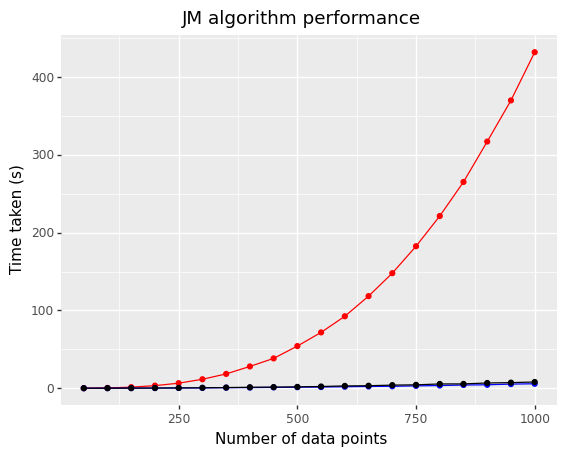

<ggplot: (8747330621181)>

In [41]:
# creating pandas dataframe
Time = times
Time2 = times2
Time3 = times3
Points = sizes
dfunif = pd.DataFrame({'Uniform' : Time, 'No of points' : Points, 'Normal' : Time2, 'Circle' : Time3})
dfnorm = pd.DataFrame({'Normal' : Time2, 'No of points' : Points})
dfcirc = pd.DataFrame({'Circle' : Time3, 'No of points' : Points})


# plotting the times and points
p = ggplot()
p1 = p + geom_line(dfcirc,aes(y=Time3,x=Points), color = "red") + geom_point(dfcirc,aes(y=Time3,x=Points), color = "red")
p2 = p1 + geom_line(dfnorm,aes(y=Time2,x=Points), color = "blue") + geom_point(dfnorm,aes(y=Time2,x=Points), color = "blue")
p3 = p2 + geom_line(dfunif,aes(y=Time,x=Points)) + geom_point(dfunif,aes(y=Time,x=Points))

p3 + labs(
    title = "JM algorithm performance",
    x = "Number of data points",
    y = "Time taken (s)"
  )

In the above plot, the red curve is corresponding to data that is generated on the circumference of a circle, blue signifies bivariate normal data and black represents uniformly generated data. As was expected, the circular generated data is considerably worse than the other two cases, with a steep increase in computational time being observed as the number of data points increases. It appears that the algorithm works similarly well in the other two cases, however, we can plot just these two cases against each other to get a better idea. We see this below.

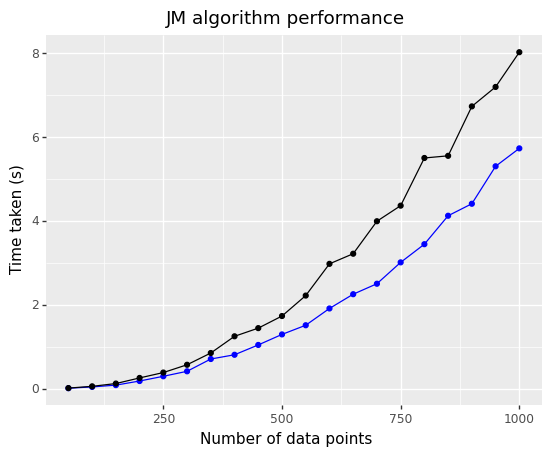

<ggplot: (8747331181496)>

In [34]:
# plotting the computational time of previous experiment
# just for normal and uniform data

p1 = ggplot()
p2 = p1 + geom_line(dfnorm,aes(y=Time2,x=Points), color = "blue") + geom_point(dfnorm,aes(y=Time2,x=Points), color = "blue")
p3 = p2 + geom_line(dfunif,aes(y=Time,x=Points)) + geom_point(dfunif,aes(y=Time,x=Points))
p3 + labs(
    title = "JM algorithm performance",
    x = "Number of data points",
    y = "Time taken (s)"
  )

Again, in this case the blue signifies bivariate normally distributed data and the black shows uniformly generated data. In this plot we see that they perform similarly in terms of computational time, however, the algorithm consistently works better in the bivariate normal case. This is probably due to the fact that fewer points will be in the set forming the convex hull, causing a reduction in the time taken to carry out the procedure.